In [482]:
import pandas as pd
import numpy as np
from datetime import datetime, date, time
import seaborn as sns

In [483]:
data_location= "dataset_SCL.csv"
data= pd.read_csv(data_location,  sep=",")

C:\Users\Javiera\anaconda3\envs\dhdsblend2021\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [484]:
data.sample(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
17047,2017-03-26 11:20:00,7811,SCEL,SABE,LAN,2017-03-26 11:26:00,7811,SCEL,SABE,DSM,26,3,2017,Domingo,I,Grupo LATAM,Santiago,Buenos Aires
65867,2017-12-31 12:31:00,302,SCEL,SCSE,LAN,2017-12-31 12:29:00,302,SCEL,SCSE,LXP,31,12,2017,Domingo,N,Grupo LATAM,Santiago,La Serena
7508,2017-02-15 06:40:00,71,SCEL,SCIE,SKU,2017-02-15 06:40:00,71,SCEL,SCIE,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
28659,2017-06-08 18:10:00,57,SCEL,SCQP,SKU,2017-06-08 18:12:00,57,SCEL,SCQP,SKU,8,6,2017,Jueves,N,Sky Airline,Santiago,Temuco
19006,2017-04-27 20:20:00,194,SCEL,SCAR,SKU,2017-04-27 20:19:00,194,SCEL,SCAR,SKU,27,4,2017,Jueves,N,Sky Airline,Santiago,Arica


## Siglas
Fecha-I : Fecha y hora programada del vuelo.  
Vlo-I : Número de vuelo programado.  
Ori-I : Código de ciudad de origen programado.  
Des-I : Código de ciudad de destino programado.  
Emp-I : Código aerolínea de vuelo programado.  
Fecha-O : Fecha y hora de operación del vuelo.  
Vlo-O : Número de vuelo de operación del vuelo.  
Ori-O : Código de ciudad de origen de operación  
Des-O : Código de ciudad de destino de operación.  
Emp-O : Código aerolínea de vuelo operado.  
DIA : Día del mes de operación del vuelo.  
MES : Número de mes de operación del vuelo.  
AÑO : Año de operación del vuelo.  
DIANOM : Día de la semana de operación del vuelo.  
TIPOVUELO : Tipo de vuelo, I =Internacional, N =Nacional.  
OPERA : Nombre de aerolínea que opera.  
SIGLAORI : Nombre ciudad origen.  
SIGLADES : Nombre ciudad destino  

In [485]:
data.shape

(68206, 18)

In [486]:
data.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [487]:
data.dtypes

Fecha-I      object
Vlo-I        object
Ori-I        object
Des-I        object
Emp-I        object
Fecha-O      object
Vlo-O        object
Ori-O        object
Des-O        object
Emp-O        object
DIA           int64
MES           int64
AÑO           int64
DIANOM       object
TIPOVUELO    object
OPERA        object
SIGLAORI     object
SIGLADES     object
dtype: object

In [488]:
data.describe()

,DIA,MES,AÑO
count,68206.000000,68206.000000,68206.000000
mean,15.714790,6.622585,2017.000029
std,8.782886,3.523321,0.005415
min,1.000000,1.000000,2017.000000
25%,8.000000,3.000000,2017.000000
50%,16.000000,7.000000,2017.000000
75%,23.000000,10.000000,2017.000000
max,31.000000,12.000000,2018.000000


In [489]:
data["Fecha-I"]=pd.to_datetime(data["Fecha-I"])
data["Fecha-O"]= pd.to_datetime(data["Fecha-O"])

In [490]:
data["Retraso"]= data["Fecha-O"]- data["Fecha-I"]

In [491]:
data.Retraso.sample(10)

35212   -1 days +23:59:00
28445     0 days 00:05:00
17579     0 days 00:10:00
5563      0 days 00:09:00
55583     0 days 00:12:00
35882     0 days 00:10:00
29498     0 days 01:29:00
46303   -1 days +23:58:00
45069     0 days 00:04:00
60221   -1 days +23:59:00
Name: Retraso, dtype: timedelta64[ns]

In [492]:
data["dif_min"]= (data["Fecha-O"]- data["Fecha-I"]).dt.total_seconds()/60
data["dif_min"].value_counts()

 0.0      4789
-1.0      4026
 1.0      3921
 2.0      3622
-2.0      3582
          ... 
 124.0       5
 149.0       4
 136.0       4
 146.0       4
 139.0       3
Name: dif_min, Length: 176, dtype: int64

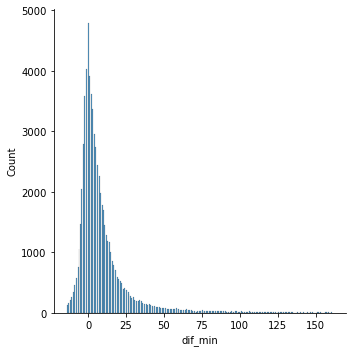

In [493]:

sns.displot(data= data, x= data["dif_min"])


In [496]:
data["Retraso_dummie"]= np.where(data["dif_min"]>0,1,0)

In [497]:
data.sample(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Retraso,dif_min,Retraso_dummie
3159,2017-01-14 11:00:00,170,SCEL,SCDA,LAN,2017-01-14 11:02:00,170,SCEL,SCDA,LAN,...,1,2017,Sabado,N,Grupo LATAM,Santiago,Iquique,0 days 00:02:00,2.0,1
58280,2017-11-10 20:00:00,93,SCEL,SCCI,LAN,2017-11-10 20:16:00,93,SCEL,SCCI,LAN,...,11,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas,0 days 00:16:00,16.0,1
30384,2017-06-09 12:30:00,251,SCEL,SCJO,LAN,2017-06-09 12:35:00,251,SCEL,SCJO,LXP,...,6,2017,Viernes,N,Grupo LATAM,Santiago,Osorno,0 days 00:05:00,5.0,1
35056,2017-07-11 13:59:00,124,SCEL,SCFA,LAN,2017-07-11 16:11:00,124,SCEL,SCFA,LAN,...,7,2017,Martes,N,Grupo LATAM,Santiago,Antofagasta,0 days 02:12:00,132.0,1
9812,2017-02-12 07:45:00,287,SCEL,SCTE,LAN,2017-02-12 07:52:00,287,SCEL,SCTE,LXP,...,2,2017,Domingo,N,Grupo LATAM,Santiago,Puerto Montt,0 days 00:07:00,7.0,1


In [498]:
data["Retraso_dummie"].value_counts()

1    45507
0    22699
Name: Retraso_dummie, dtype: int64

In [499]:
data.sample(5)

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Retraso,dif_min,Retraso_dummie
64594,2017-12-04 14:26:00,99,SCEL,SCCI,LAN,2017-12-04 14:26:00,99.0,SCEL,SCCI,LAN,...,12,2017,Lunes,N,Grupo LATAM,Santiago,Punta Arenas,0 days 00:00:00,0.0,0
63352,2017-12-09 13:45:00,53,SCEL,SCQP,SKU,2017-12-09 13:58:00,53,SCEL,SCQP,SKU,...,12,2017,Sabado,N,Sky Airline,Santiago,Temuco,0 days 00:13:00,13.0,1
33903,2017-07-21 08:10:00,51,SCEL,SCQP,SKU,2017-07-21 08:35:00,51,SCEL,SCQP,SKU,...,7,2017,Viernes,N,Sky Airline,Santiago,Temuco,0 days 00:25:00,25.0,1
1123,2017-01-10 22:30:00,8160,SCEL,SPJC,TAM,2017-01-10 22:53:00,8160,SCEL,SPJC,TAM,...,1,2017,Martes,I,Grupo LATAM,Santiago,Lima,0 days 00:23:00,23.0,1
20557,2017-04-27 17:05:00,306,SCEL,SCSE,LAN,2017-04-27 17:15:00,306,SCEL,SCSE,LXP,...,4,2017,Jueves,N,Grupo LATAM,Santiago,La Serena,0 days 00:10:00,10.0,1


In [500]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

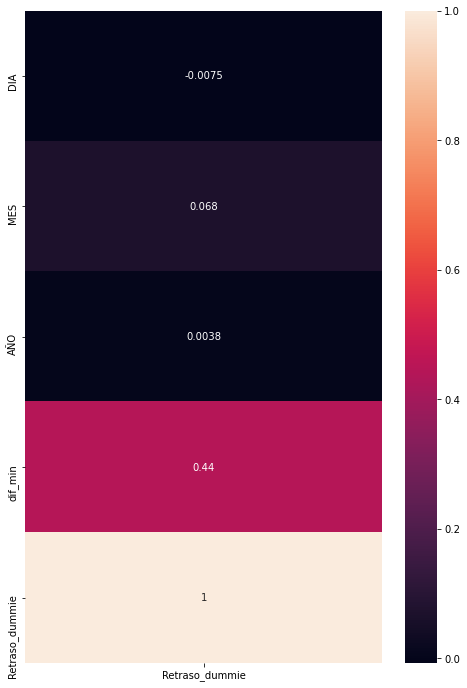

In [501]:
plt.figure(figsize=(8,12))
sns.heatmap(data.corr()[['Retraso_dummie']], annot=True)

In [502]:
data["atraso_15"]= np.where(data["dif_min"]>15,1,0)

In [503]:
data["atraso_15"].value_counts()

0    55592
1    12614
Name: atraso_15, dtype: int64

In [573]:
data["AÑO"].value_counts()

2017    68204
2018        2
Name: AÑO, dtype: int64

In [583]:
#emporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no
fecha1= pd.to_datetime('20161215', format='%Y%m%d')
fecha2= pd.to_datetime('20170303',format='%Y%m%d')
fecha3= pd.to_datetime('20170715',format='%Y%m%d')
fecha4= pd.to_datetime('20170731',format='%Y%m%d')
fecha5= pd.to_datetime('20170911',format='%Y%m%d')
fecha6= pd.to_datetime('20170930',format='%Y%m%d')
fecha7= pd.to_datetime('20171215', format='%Y%m%d')
fecha8= pd.to_datetime('20180303',format='%Y%m%d')


data["temporada_alta"] = np.where((data['Fecha-I']>= fecha1) & (data['Fecha-I']<= fecha2) |
                                  (data['Fecha-I']>= fecha3) & (data['Fecha-I']<= fecha4) |
                                  (data['Fecha-I']>= fecha5) & (data['Fecha-I']<= fecha6) |
                                  (data['Fecha-I']>= fecha7) & (data['Fecha-I']<= fecha8)
                                  ,1,0)

data["temporada_alta"].value_counts()

0    45995
1    22211
Name: temporada_alta, dtype: int64

In [588]:
data.iloc[63119]

Fecha-I           2017-12-15 06:10:00
Vlo-I                               7
Ori-I                            SCEL
Des-I                            SCCI
Emp-I                             SKU
Fecha-O           2017-12-15 06:22:00
Vlo-O                               7
Ori-O                            SCEL
Des-O                            SCCI
Emp-O                             SKU
DIA                                15
MES                                12
AÑO                              2017
DIANOM                        Viernes
TIPOVUELO                           N
OPERA                     Sky Airline
SIGLAORI                     Santiago
SIGLADES                 Punta Arenas
Retraso               0 days 00:12:00
dif_min                            12
Retraso_dummie                      1
atraso_15                           0
temporada_alta                      1
Name: 63119, dtype: object

In [504]:
data["Fecha-I"]

In [614]:
#mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a
#Fecha-I 
mañana1= pd.to_datetime('05:00:00',format='%H:%M:%S')
mañana2=pd.to_datetime('11:59:00', format='%H:%M:%S')
tarde1= pd.to_datetime('12:00:00',format='%H:%M:%S')
tarde2=pd.to_datetime('18:59:00', format='%H:%M:%S')
noche1= pd.to_datetime('19:00:00',format='%H:%M:%S')
noche2=pd.to_datetime('04:59:00', format='%H:%M:%S')
data['periodo_dia']= np.where((data['Fecha-I']>= mañana1) & (data['Fecha-I']<= mañana2),'mañana','tarde')
data['periodo_dia'].value_counts()

tarde    68206
Name: periodo_dia, dtype: int64

In [629]:
#data['periodo_dia']=np.where((data['Fecha-I']>= tarde1) & (data['Fecha-I']<= tarde2),'tarde','noche')
#data['periodo_dia'].value_counts()

In [504]:
data.shape

(68206, 22)

In [533]:

data_ml= data.drop(columns=["Fecha-I", "Vlo-I","Fecha-O", "Vlo-O", "Retraso", "atraso_15"] )

columnas_dummie=["Ori-I", "Des-I", "Emp-I", "Ori-O", "Des-O", "Emp-O", "DIANOM", "TIPOVUELO", "OPERA", "SIGLAORI", "SIGLADES"]

In [534]:
data_ml.columns

Index(['Ori-I', 'Des-I', 'Emp-I', 'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES',
       'AÑO', 'DIANOM', 'TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES',
       'dif_min', 'Retraso_dummie'],
      dtype='object')

In [535]:
data_ml.shape

(68206, 16)

In [543]:
data_ml = pd.get_dummies(data=data_ml, columns= ["Ori-I", "Des-I", "Emp-I", "Ori-O", "Des-O", "Emp-O", "DIANOM", "TIPOVUELO", "OPERA", "SIGLAORI", "SIGLADES"], drop_first= True)


In [548]:
data_ml.sample(3)

,DIA,MES,AÑO,dif_min,Retraso_dummie,Des-I_EGLL,Des-I_EGYP,Des-I_KATL,Des-I_KDFW,Des-I_KIAH,...,"SIGLADES_San Juan, Arg.",SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington
19442,6,4,2017,12.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43845,9,8,2017,24.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10578,6,2,2017,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [530]:
#data_ml= pd.concat([data_ml, dummies], axis=1)
#data_ml= data_ml.drop(columns= columnas_dummie)

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Retraso', 'dif_min', 'Retraso_dummie',
       'atraso_15'],
      dtype='object')

In [550]:
data_ml.sample(5)

,DIA,MES,AÑO,dif_min,Retraso_dummie,Des-I_EGLL,Des-I_EGYP,Des-I_KATL,Des-I_KDFW,Des-I_KIAH,...,"SIGLADES_San Juan, Arg.",SIGLADES_Santa Cruz,SIGLADES_Sao Paulo,SIGLADES_Sydney,SIGLADES_Temuco,SIGLADES_Toronto,SIGLADES_Tucuman,SIGLADES_Ushuia,SIGLADES_Valdivia,SIGLADES_Washington
62429,18,12,2017,1.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57677,30,11,2017,14.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57992,18,11,2017,13.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19269,3,4,2017,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20129,16,4,2017,-1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Modelo

In [551]:
X = data_ml.drop(columns=['Retraso_dummie'])
y = data_ml['Retraso_dummie']

16750    1
Name: Retraso_dummie, dtype: int32

In [562]:
# Separamos un set de testeo para evaluar el modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [563]:
# Verificamos que coincidan las proporciones del target
y_train.mean(), y_test.mean()

(0.6672010008992454, 0.6671944639924936)

In [564]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [565]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [566]:
accuracy_score(y_train, lr.predict(X_train_std))

0.6471830159909293

Text(33.0, 0.5, 'Reales')

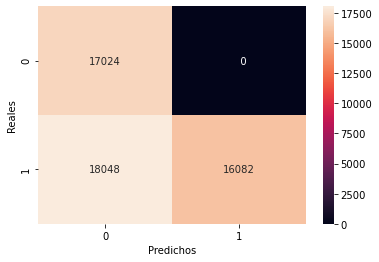

In [567]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

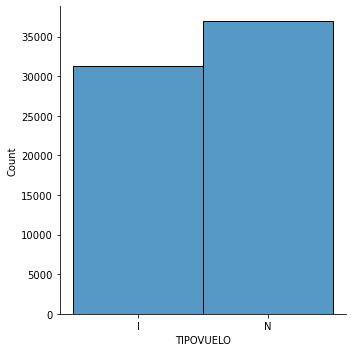

In [195]:
sns.displot(data=data, x="TIPOVUELO")